# Thera Bank Personal Loan Campaign:
    
## Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

## Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

In [1]:
#conda install -c districtdatalabs yellowbrick

In [3]:
# Q1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

import warnings 
warnings.filterwarnings('ignore')

#Skewness 
import statsmodels.api as sm
import scipy.stats as stats
#hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ClassificationReport, ROCAUC

In [5]:
#Load and read Bank data to variable - Bank_Personal_Loan_Modelling.csv 
bankData = pd.read_csv("Bank_Personal_Loan_Modelling.csv")  

In [6]:
bankData.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
#Check shape
bankData.shape

(5000, 14)

In [8]:
#Check data types
bankData.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [9]:
#Information
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
# No Missing value found

In [10]:
#Check null value
bankData.isna().apply(pd.value_counts)   

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


In [11]:
# No NULL values found

In [14]:
# Describe - 
bankData.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [13]:
# My Observation is: 'Experience' column has negative values

In [15]:
#Now will Replace the negative values with the mean value of the 'Experience' column
exp_med = bankData.loc[:,"Experience"].median()
bankData.loc[:, 'Experience'].replace([-1, -2, -3], [exp_med, exp_med, exp_med], inplace=True)

In [16]:
bankData.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [20]:
# Q2.EDA:  Study  the  data  distribution  in  each  attribute  and  target  variable
# Q2.1 Number of unique in each column?
bankData.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [26]:
#Q2.2 Number of people with zero mortgage?
NumberOfPeople = bankData[bankData['Mortgage']<1].shape[0]
print(" There are {} people with zero Mortgage".format(NumberOfPeople))

 There are 3462 people with zero Mortgage


In [27]:
#Q2.3 Number of people with zero credit card spending per month?

numberZeroCCSpending=bankData[bankData['CCAvg']<1].shape[0]
print(" Number of people with zero credit card spending per month is {} ".format(numberZeroCCSpending))


 Number of people with zero credit card spending per month is 1683 


In [28]:
# Get data model ready
# Value counts of all categorical columns.
bankData['Education']=bankData['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'})
bankData['Education'].value_counts()

Undergrad                2096
Advanced/Professional    1501
Graduate                 1403
Name: Education, dtype: int64

In [29]:
#Q2.5 Univariate Analysis 

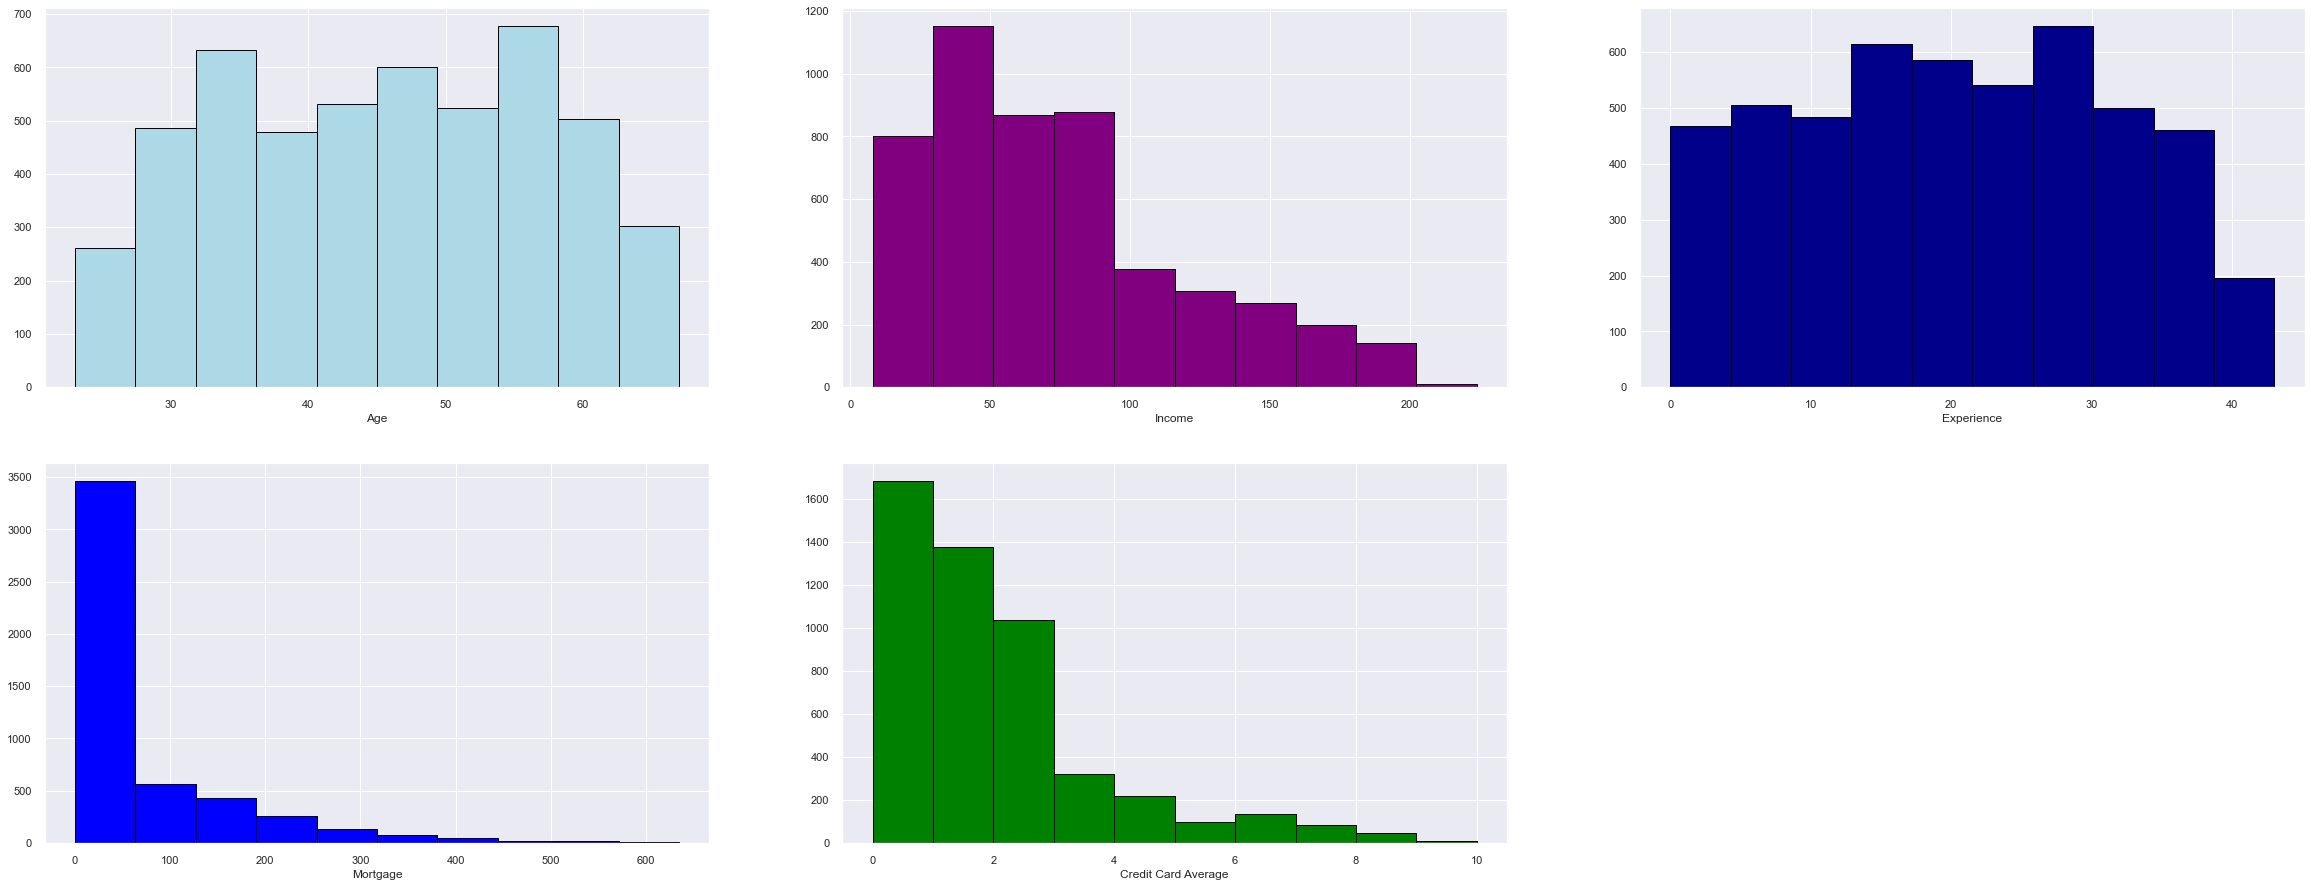

In [39]:
plt.figure(figsize= (40.5,40.5))
plt.subplot(5,3,1)
plt.hist(bankData['Age'], color='lightblue', edgecolor = 'black')
plt.xlabel('Age')

plt.subplot(5,3,2)
plt.hist(bankData['Income'], color='purple', edgecolor = 'black')
plt.xlabel('Income')

plt.subplot(5,3,3)
plt.hist(bankData['Experience'], color='darkblue', edgecolor = 'black')
plt.xlabel('Experience')

plt.subplot(5,3,4)
plt.hist(bankData['Mortgage'],color='blue', edgecolor = 'black')
plt.xlabel('Mortgage')

plt.subplot(5,3,5)
plt.hist(bankData['CCAvg'], color='green', edgecolor = 'black')
plt.xlabel('Credit Card Average')

plt.show()

**Observation**
1.  Age & Experience seems to be quiet normally distributed
2. Income, Mortgage & Credit Card Average are highly skewed

In [40]:
# Check for Skewness of data
Skewness = pd.DataFrame({'Skewness' : [stats.skew(bankData['Age']),stats.skew(bankData['Experience']),stats.skew(bankData['Income']),stats.skew(bankData['CCAvg'])
                                      ,stats.skew(bankData.Mortgage)]},index=['Age','Experience','Income','CCAvg','Mortgage'])
Skewness

,Skewness
Age,-0.029332
Experience,-0.014096
Income,0.841086
CCAvg,1.597964
Mortgage,2.103371


**Observation :**

1. Age and Experience seems to be quiet Symmetrical.
2. Income, Credit Card Average and Mortgage are Positively skewed.

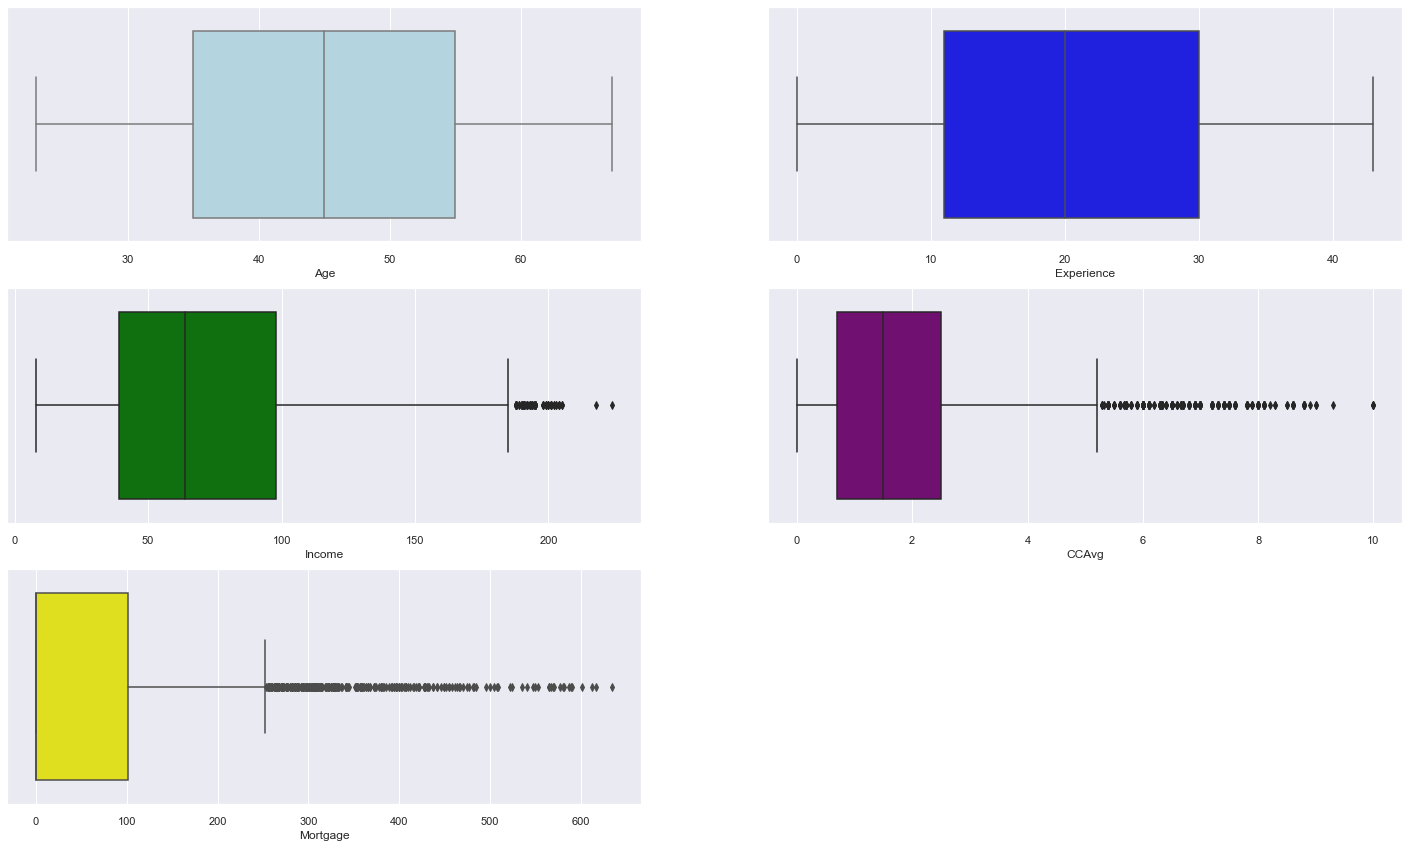

In [41]:
plt.figure(figsize= (25,25))
plt.subplot(5,2,1)
sns.boxplot(x= bankData['Age'], color='lightblue')

plt.subplot(5,2,2)
sns.boxplot(x= bankData['Experience'], color='blue')

plt.subplot(5,2,3)
sns.boxplot(x= bankData['Income'], color='green')

plt.subplot(5,2,4)
sns.boxplot(x= bankData['CCAvg'], color='purple')

plt.subplot(5,2,5)
sns.boxplot(x= bankData['Mortgage'], color='yellow')

**Observation**
* Age feature is normally distributed 

* Experience is normally distributed with more customer having experience starting from 11 years to 30 Years.

* Income is positively skewed. Majority of the customers have income between 45K and 55K. 

* Credit Card Avarage spending is between 0K to 10K and majority spends less than 2.5K.

* Mortgage 70% of the individuals have a mortgage of less than 40K. 

Text(0.5, 1.0, 'Credit Card Distribution')

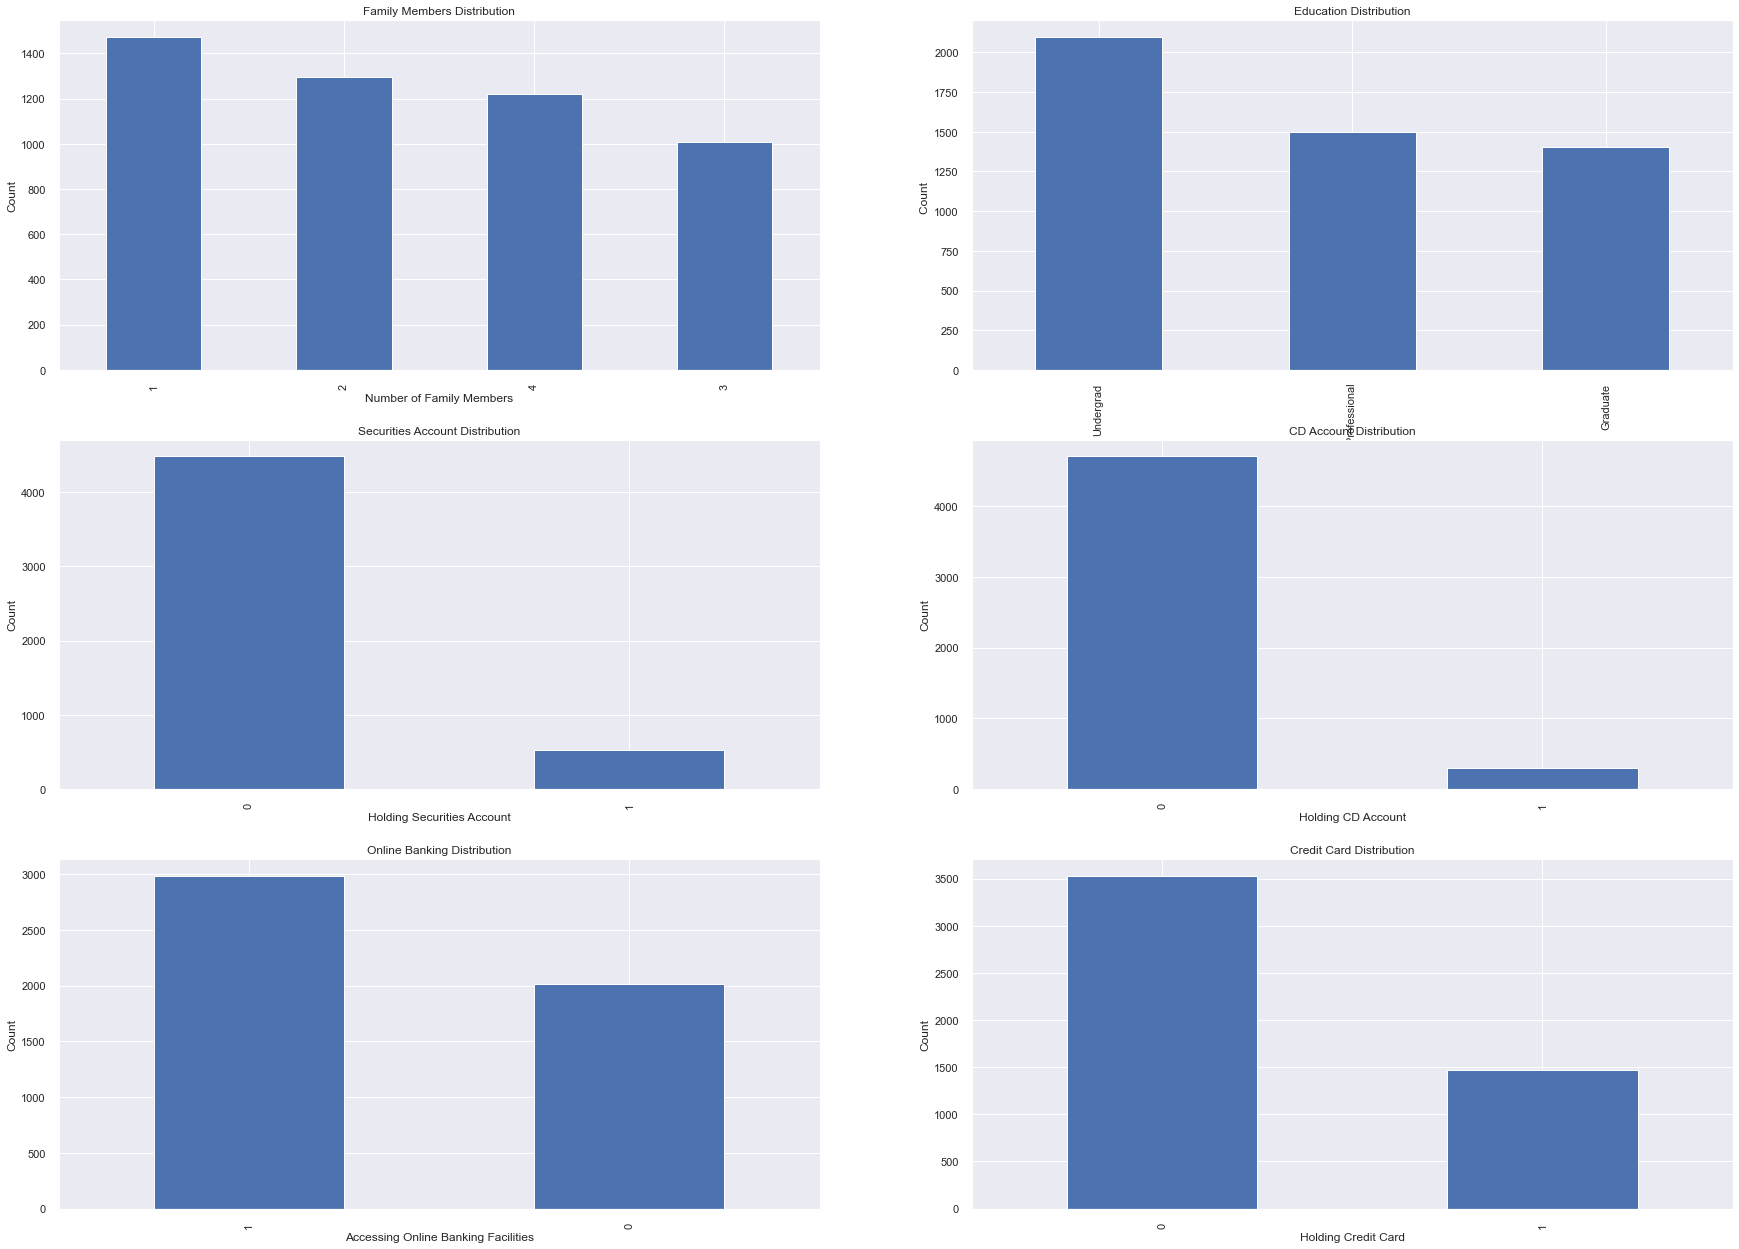

In [42]:
plt.figure(figsize=(30,45))

plt.subplot(6,2,1)
bankData['Family'].value_counts().plot(kind="bar", align='center')
plt.xlabel("Number of Family Members")
plt.ylabel("Count")
plt.title("Family Members Distribution")


plt.subplot(6,2,2)
bankData['Education'].value_counts().plot(kind="bar", align='center')
plt.xlabel('Level of Education')
plt.ylabel('Count ')
plt.title('Education Distribution')


plt.subplot(6,2,3)
bankData['Securities Account'].value_counts().plot(kind="bar", align='center')
plt.xlabel('Holding Securities Account')
plt.ylabel('Count')
plt.title('Securities Account Distribution')


plt.subplot(6,2,4)
bankData['CD Account'].value_counts().plot(kind="bar", align='center')
plt.xlabel('Holding CD Account')
plt.ylabel('Count')
plt.title("CD Account Distribution")


plt.subplot(6,2,5)
bankData['Online'].value_counts().plot(kind="bar", align='center')
plt.xlabel('Accessing Online Banking Facilities')
plt.ylabel('Count')
plt.title("Online Banking Distribution")


plt.subplot(6,2,6)
bankData['CreditCard'].value_counts().plot(kind="bar", align='center')
plt.xlabel('Holding Credit Card')
plt.ylabel('Count')
plt.title("Credit Card Distribution")

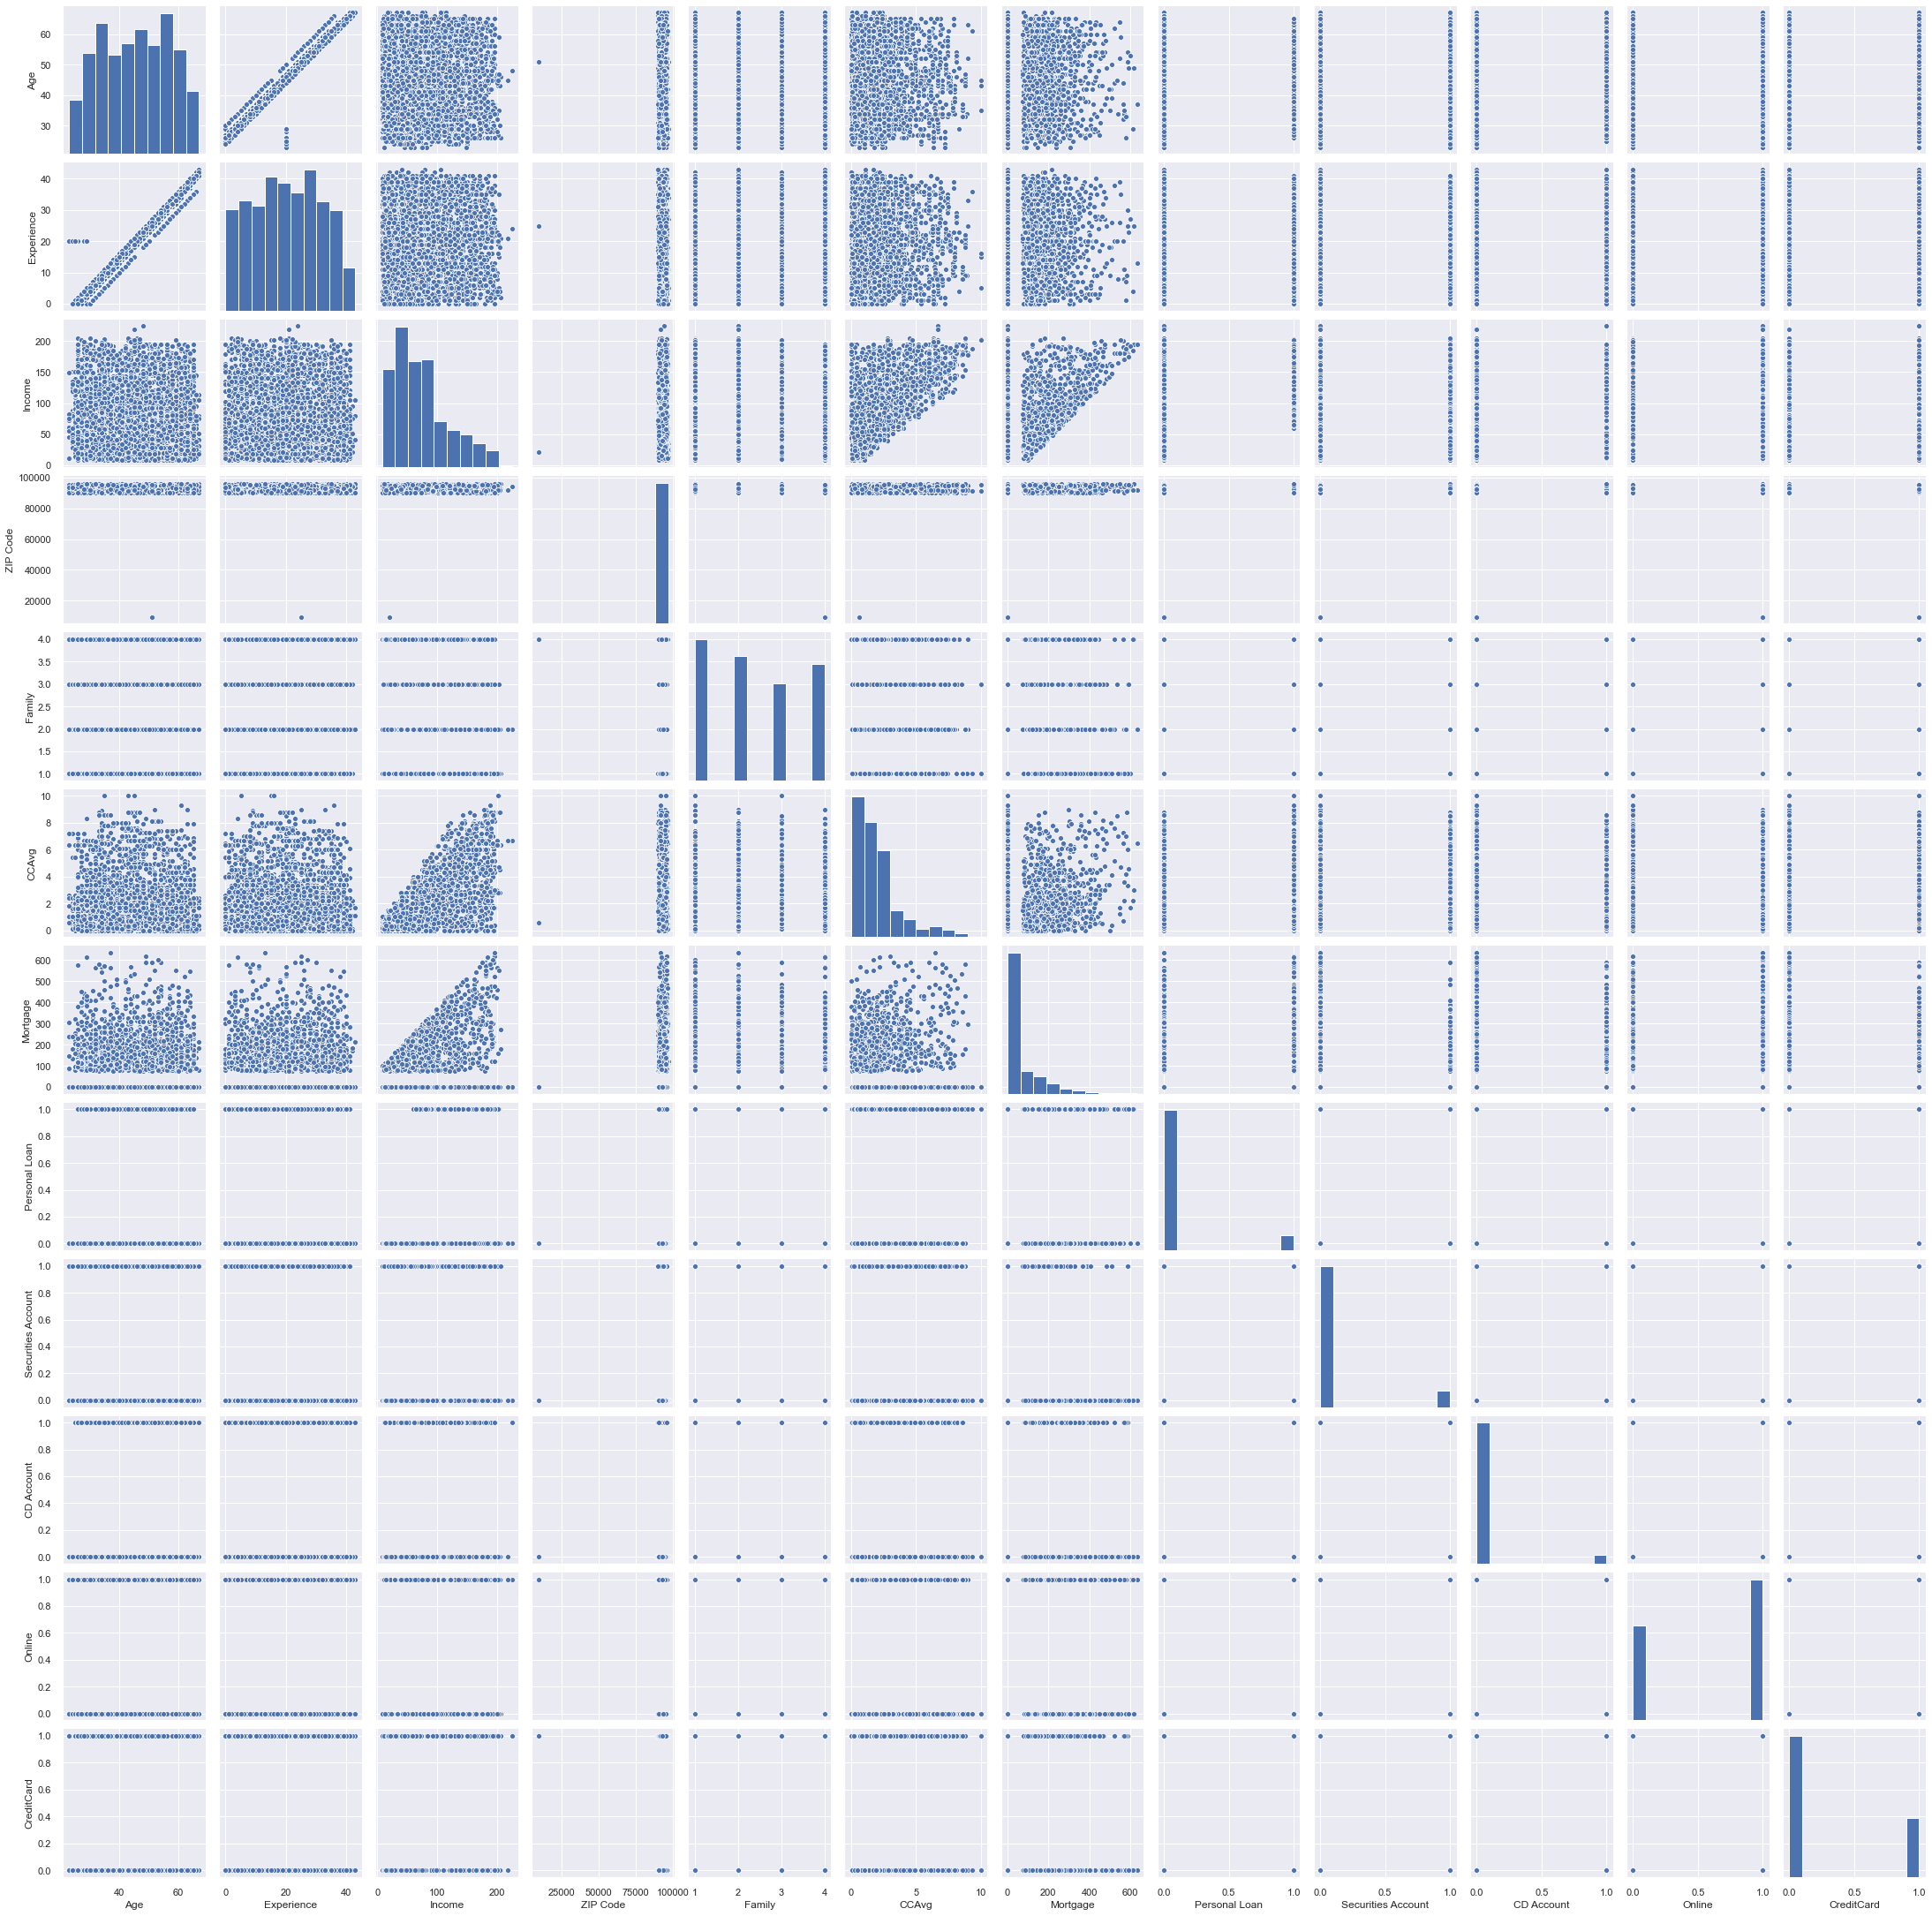

In [43]:
sns.pairplot(bankData.iloc[:,1:])

**Observation**

'Age' has an association with 'Experience

In [44]:
#Dependant variable
bankData["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

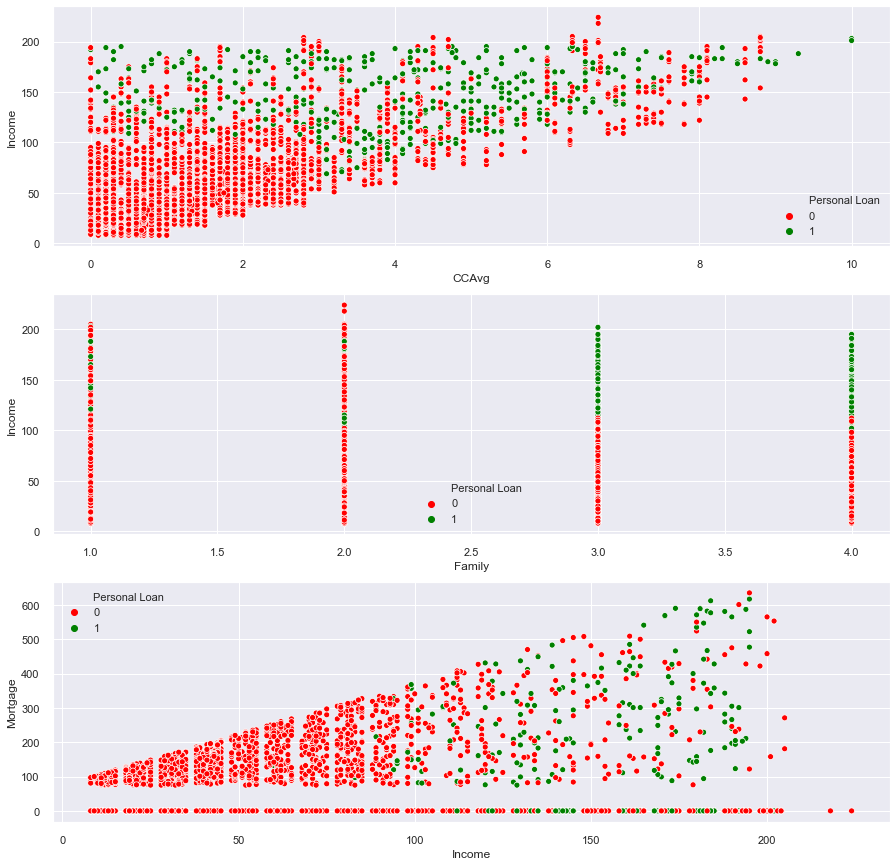

In [45]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(bankData['CCAvg'], bankData['Income'], hue = bankData['Personal Loan'], palette= ['red','green'])

plt.subplot(3,1,2)
sns.scatterplot(bankData['Family'], bankData['Income'], hue = bankData['Personal Loan'], palette= ['red','green'])

plt.subplot(3,1,3)
sns.scatterplot(bankData['Income'], bankData['Mortgage'], hue = bankData['Personal Loan'], palette= ['red','green'])


**Observation**

* Persons who have personal loan have a higher credit card average.

* Members of family increases (say >=3) the necessity of loan is also increasing.
* Income increases the mortgage value also increases 

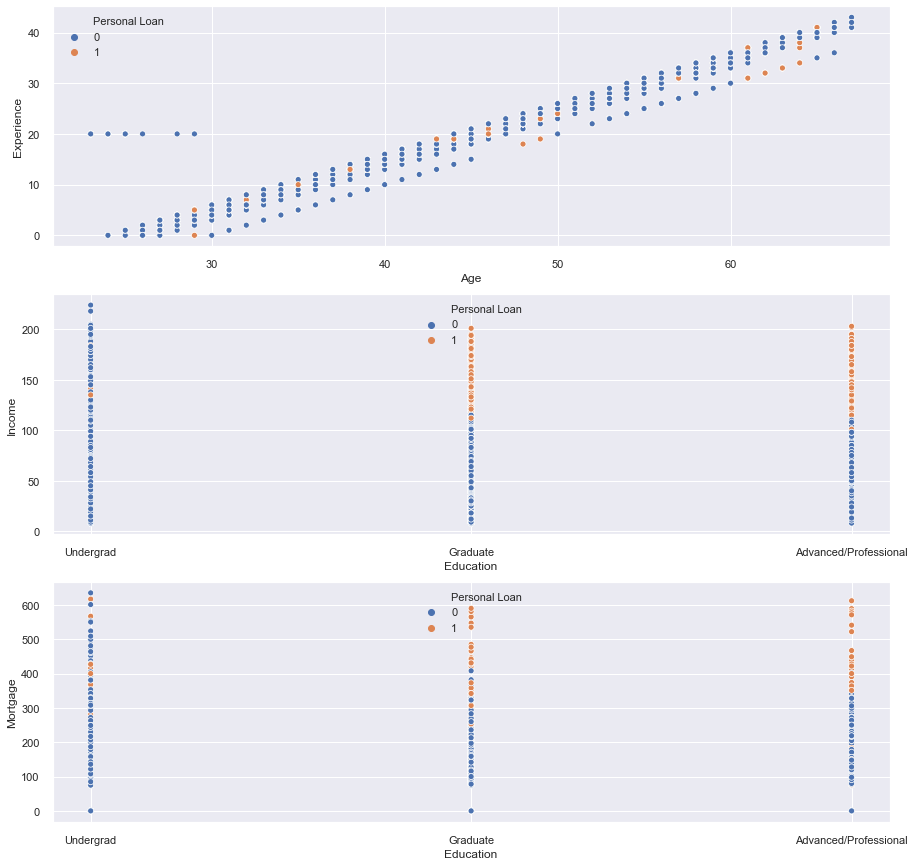

In [46]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(bankData['Age'], bankData['Experience'], hue = bankData['Personal Loan'])

plt.subplot(3,1,2)
sns.scatterplot(bankData['Education'],bankData['Income'], hue = bankData['Personal Loan'])

plt.subplot(3,1,3)
sns.scatterplot(bankData['Education'], bankData['Mortgage'], hue = bankData['Personal Loan'])

**Observation**

* 'Age' has a very strong association with 'Experience' but nothing gets affected with loan attribute.
* It seems that customers with Undergraduates having more income which is mere equal to the customers who has taken the personal loan.
* Graduate and Advance profesional seems to take personal loan as they have high mortgage.

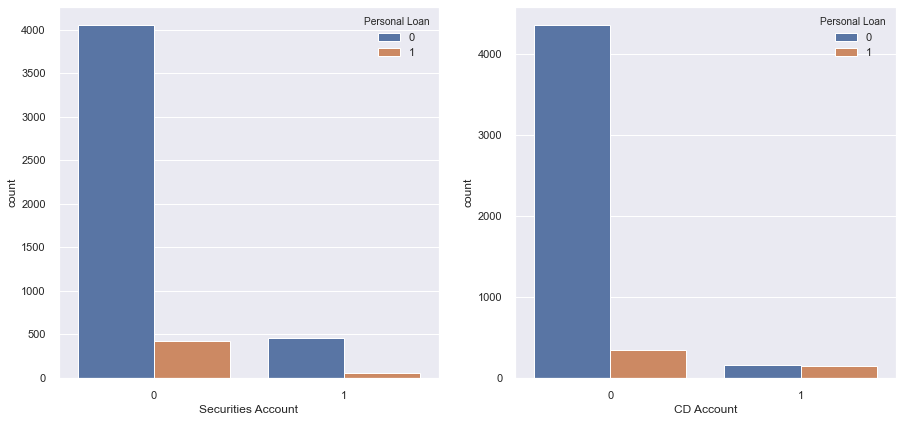

In [48]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.countplot(x="Securities Account", data=bankData ,hue="Personal Loan")

plt.subplot(2,2,2)
sns.countplot(x='CD Account' ,data=bankData ,hue='Personal Loan')

**Observation**
* Majority of customers who does not have loan is holding securities account, Whereas small proportion of customers having loan does hold but majority of them do not have securities account.
* Customers who does not have CD account, does not have loan as well, but almost all customers who has CD account has loan as well

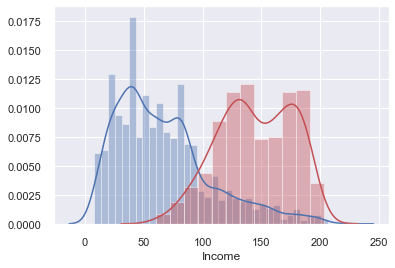

In [51]:
sns.distplot(bankData[bankData["Personal Loan"] == 0]['Income'], color = 'b')
sns.distplot(bankData[bankData["Personal Loan"] == 1]['Income'], color = 'r')

In [54]:
# Observation from above plot: Those who have personal loan also have a higher income

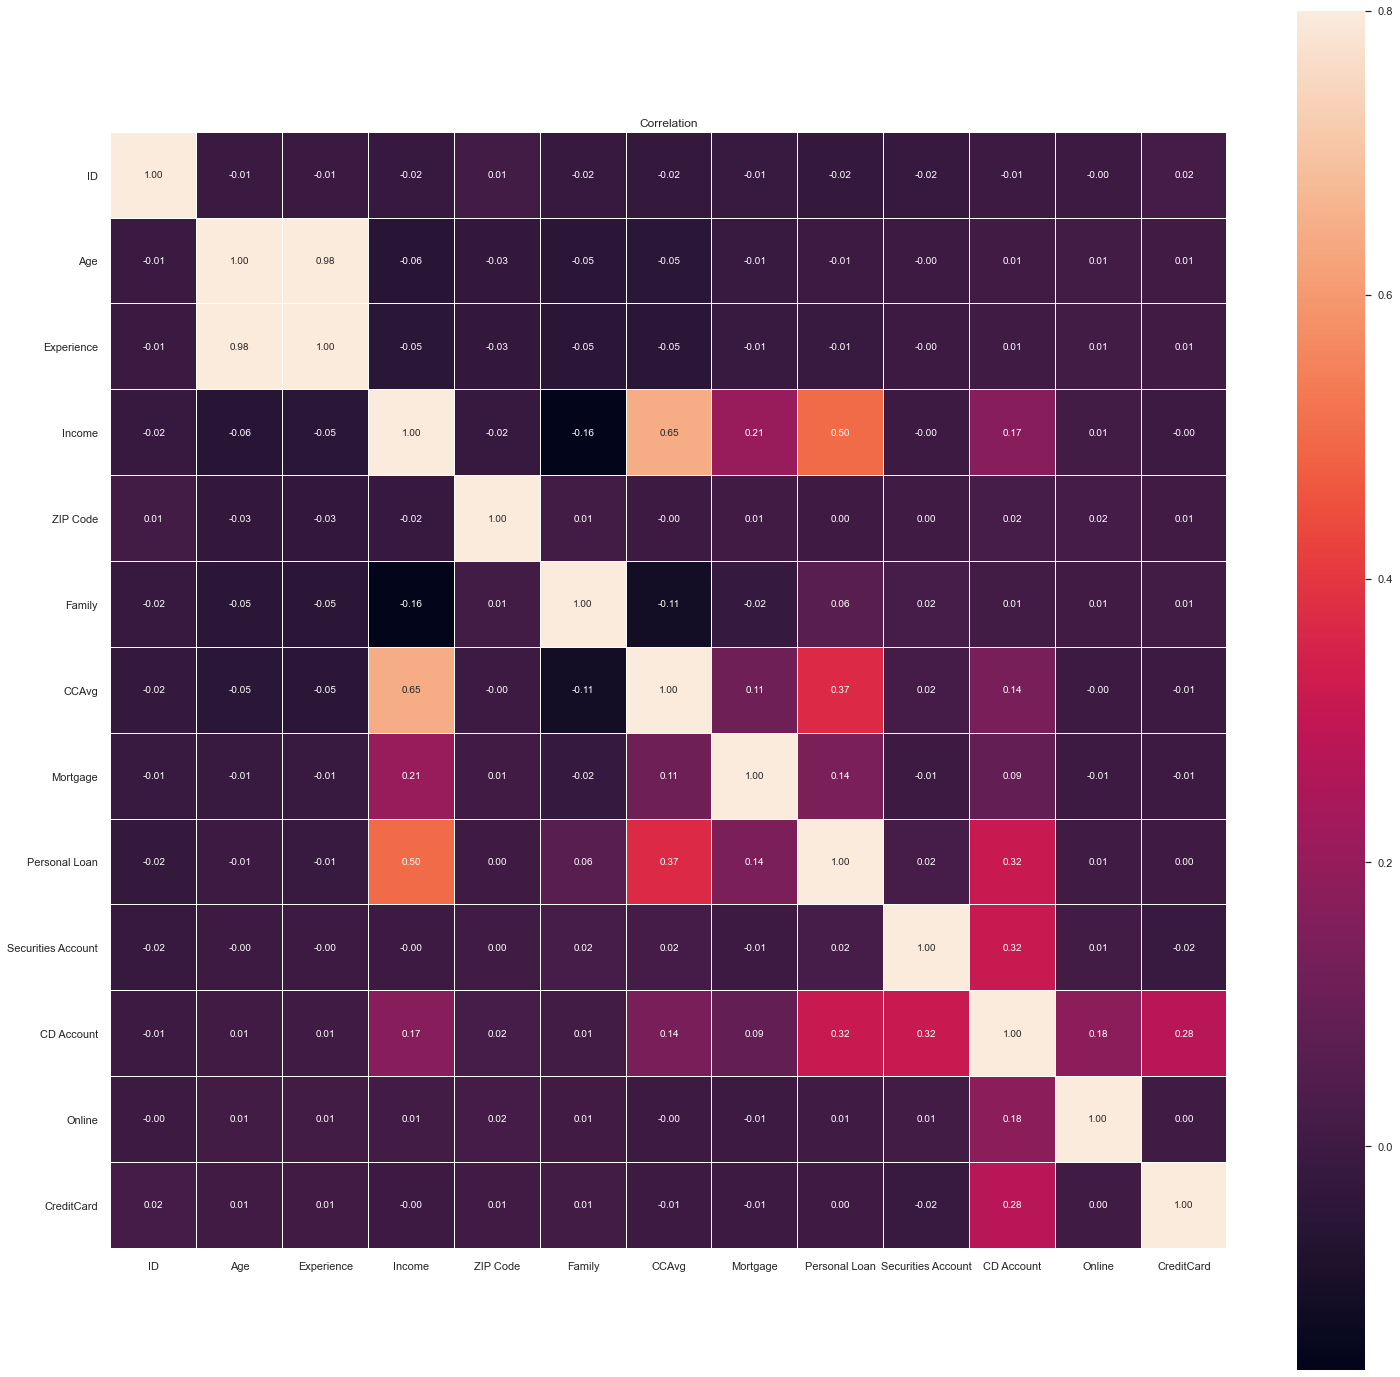

In [55]:
plt.figure(figsize=(25, 25))
ax = sns.heatmap(bankData.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

**Observation**
* Age and Experoence is highly corelated
* Income and Credit Card Average also corelated

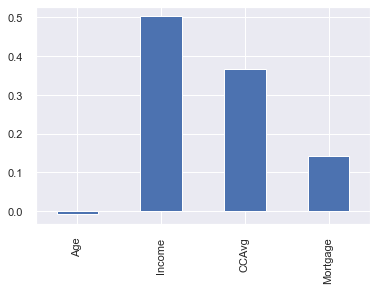

In [56]:
bankData[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()['Personal Loan'][1:].plot.bar()

In [57]:
# Observation from above: 'Income' & 'Credit Card Average' has some correlation with 'Personal Loan'.

In [58]:
#Get data model ready dummy variables for education
bankData = pd.concat([bankData,pd.get_dummies(bankData['Education'], prefix='Education',drop_first=True)],axis=1)

In [60]:
#drop columns ID, Education   
bankData.drop(['ID','Education'],inplace=True,axis=1)

In [61]:
#Q3 - Split the data into training and test set in the ratio of 70:30 respectively 
train_set, test_set = train_test_split(bankData, test_size=0.3 , random_state=5)

In [62]:
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

In [63]:
logmodel = LogisticRegression()
logmodel.fit(train_set,train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
predict = logmodel.predict(test_set)
predictProb = logmodel.predict_proba(test_set)

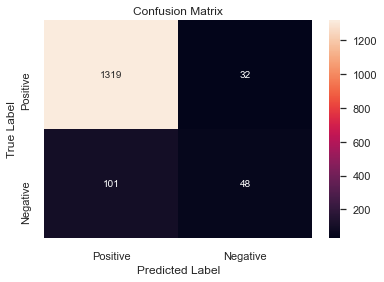

In [65]:
# Confusion Matrix
cm = confusion_matrix(test_labels, predict)

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [75]:
# Classification Report - model
print(classification_report(test_labels, predict))
print(confusion_matrix(test_labels, predict))
print(accuracy_score(test_labels, predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.89      0.60      0.72       149

    accuracy                           0.95      1500
   macro avg       0.92      0.80      0.85      1500
weighted avg       0.95      0.95      0.95      1500

[[1340   11]
 [  59   90]]
0.9533333333333334


In [76]:
# Now scaling the model
scaler=preprocessing.StandardScaler()
scaled_X_train=scaler.fit_transform(train_set)
scaled_X_test=scaler.fit_transform(test_set)
scalelogmodel = LogisticRegression()
scalelogmodel.fit(scaled_X_train,train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
predict = scalelogmodel.predict(scaled_X_test)
# Classification Report
print(classification_report(test_labels, predict))
print(confusion_matrix(test_labels, predict))
print(accuracy_score(test_labels, predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.89      0.60      0.72       149

    accuracy                           0.95      1500
   macro avg       0.92      0.80      0.85      1500
weighted avg       0.95      0.95      0.95      1500

[[1340   11]
 [  59   90]]
0.9533333333333334


**Observation:** Standarization

* Accuracy improved 91% to 95% ( 4% )
* Type 2 error reduced from 32 to 11
* type 1 error also reduced from 101 to 59

In [69]:
# droping Experience
exp_train_set=train_set.drop(['Experience'],axis=1)
exp_test_set=test_set.drop(['Experience'],axis=1)

scaler=preprocessing.StandardScaler()
scaled_X_train=scaler.fit_transform(exp_train_set)
scaled_X_test=scaler.fit_transform(exp_test_set)

scalelogmodel = LogisticRegression()
scalelogmodel.fit(scaled_X_train,train_labels)
predict = scalelogmodel.predict(scaled_X_test)

print(classification_report(test_labels, predict))
print( "confusion Matrix data {}".format(confusion_matrix(test_labels, predict)))
print("model accuracy {}".format(accuracy_score(test_labels, predict)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.89      0.60      0.71       149

    accuracy                           0.95      1500
   macro avg       0.92      0.79      0.84      1500
weighted avg       0.95      0.95      0.95      1500

confusion Matrix data [[1340   11]
 [  60   89]]
model accuracy 0.9526666666666667


**Observation :** droping Experience 
* type 1 error increased 59 to 60

In [78]:
# Parameter tuning
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.01,0.1,0.25,0.5,0.75,1]

#solver 
solver = ['newton-cg','lbfgs','liblinear','sag','saga']

In [79]:
scaler=preprocessing.StandardScaler()
scaled_X_train=scaler.fit_transform(train_set)
scaled_X_test=scaler.fit_transform(test_set)

In [80]:
hyperparameters = dict(C=C, penalty=penalty,solver=solver)
bestParameter = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
best_model = bestParameter.fit(scaled_X_train, train_labels)

In [81]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('solver:', best_model.best_estimator_.get_params()['solver'])

y_predict = best_model.predict(scaled_X_test)     
print(classification_report(test_labels, y_predict))
print( "confusion Matrix data {}".format(confusion_matrix(test_labels, y_predict)))
print("model accuracy {}".format(accuracy_score(test_labels, y_predict)))

Best Penalty: l1
Best C: 0.75
solver: liblinear
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.89      0.60      0.71       149

    accuracy                           0.95      1500
   macro avg       0.92      0.79      0.84      1500
weighted avg       0.95      0.95      0.95      1500

confusion Matrix data [[1340   11]
 [  60   89]]
model accuracy 0.9526666666666667


**Observation** :
No changes in over all performence .. so will keeping the original model.

C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.89      0.60      0.72       149

    accuracy                           0.95      1500
   macro avg       0.92      0.80      0.85      1500
weighted avg       0.95      0.95      0.95      1500

confusion Matrix data [[1340   11]
 [  59   90]]
model accuracy 0.9533333333333334


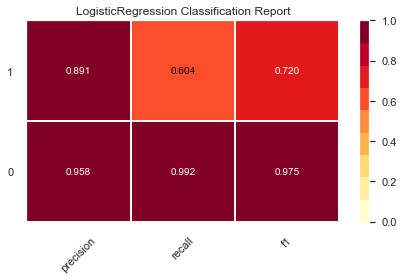

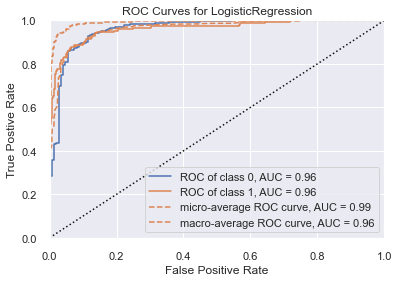

In [82]:
scaler=preprocessing.StandardScaler()
scaled_X_train=scaler.fit_transform(train_set)
scaled_X_test=scaler.fit_transform(test_set)

finalModel = LogisticRegression()
finalModel.fit(scaled_X_train,train_labels)
predict = finalModel.predict(scaled_X_test)

print(classification_report(test_labels, predict))
print( "confusion Matrix data {}".format(confusion_matrix(test_labels, predict)))
print("model accuracy {}".format(accuracy_score(test_labels, predict)))

# Visualize model performance with yellowbrick library
viz = ClassificationReport(finalModel)
viz.fit(scaled_X_train, train_labels)
viz.score(scaled_X_test,test_labels)
viz.show()
#ROCAUC
roc = ROCAUC(finalModel)
roc.fit(scaled_X_train, train_labels)
roc.score(scaled_X_test, test_labels)
roc.show()

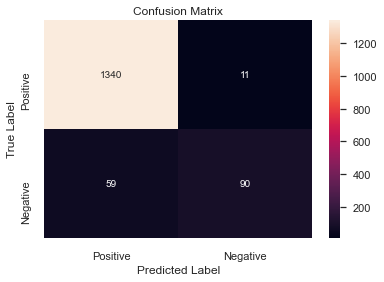

In [83]:
#Confusion Matrix after
cm = confusion_matrix(test_labels, predict)

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
#Q6 Give Business understanding of your model?

**True Positive :**
 personal loan offered to customer and customer accepted

**False Positive :** (observed=0,predicted=1):

personal loan offered to customer and customer rejected the offer

**True Negative :**
Personal loan not offred to customer and customer also not intrested in personal loan

**False Negative :** 
Predicted not to offer personal loans to customers. However, the customer is looking for a personal loan.


The model has high accuracy(95%). This will help the bank to target the campaign on the right customers for converting liability customers to personal loan customers. 
